In [184]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [231]:
kat3 = finesse.kat()
kat3.verbose=True
kat3.parse("""


l laser 1 0 nin                  
mod EOM 55.55M 0.001 1 pm nin n0 
maxtem 3                         
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4                        
m ITM 0.99 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99 0.01 0 n6 n7               

s s2 0.1 n3 n8                       
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump 
s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12                  

cav cavity ITM n5 ETM n6 
trace 2                  
attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0         
pd1 PDrefl 55.55M 0 n8*   

attr sQPD1 g 40   
attr sQPD2 g 130 

pd1 QPDrefl1 55.55M 0 n11 
pdtype QPDrefl1 x-split   

pd1 QPDrefl2 55.55M 0 n12 
pdtype QPDrefl2 x-split   

set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z             
%xaxis ITM xbeta lin 0 0.8m 500 
xaxis ETM xbeta lin 0 0.8m 500  
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-27 03:24:09.496760


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 14.472 seconds

--- Output info ---

Run date and time: 2022-06-27 03:24:09.501583
Detectors used: PDrefl, QPDrefl1, QPDrefl2, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 500']
PDrefl   : min = -1.750029622383500e-10 max = 9.999659234089619e-09
QPDrefl1 : min = -5.642664878244370e-08 max = 7.760051219651130e-06
QPDrefl2 : min = -9.260874418976189e-06 max = 2.557067507610990e-08
z        : min = 0.000000000000000e+00 max = 7.731149730627510e+01


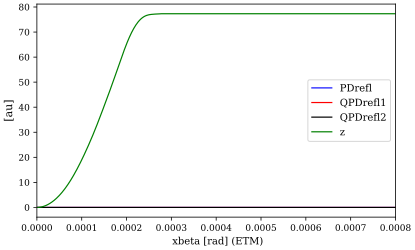

In [232]:
out2 = kat3.run()
out2.info()
out2.plot()

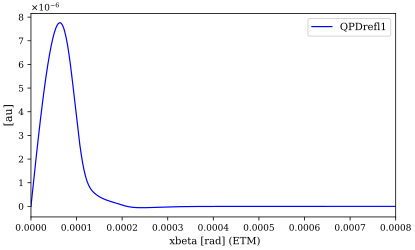

In [233]:
out2.plot(['QPDrefl1'])

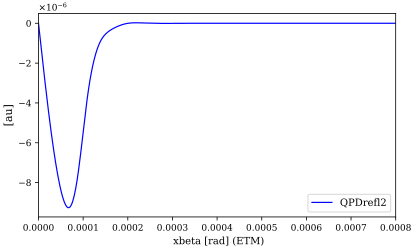

In [234]:
out2.plot(['QPDrefl2'])

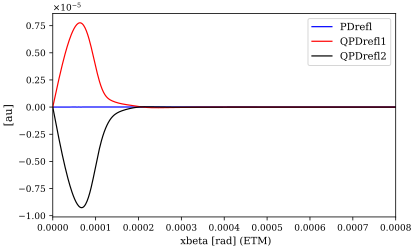

In [235]:
out2.plot(['QPDrefl1','QPDrefl2','PDrefl'])

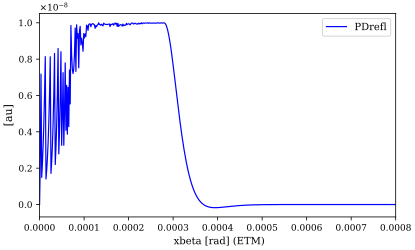

In [236]:
out2.plot(['PDrefl'])